<h1 style="text-align: center;"> Introduction to Computer Vision </h1>

In [ ]:
# Run this cell to install the necessary dependencies for this lecture
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install matplotlib

<h2>Lecture 2 (How the cameras work)</h2>

<ul style="font-weight: 100;">
    <li><b>How the cameras work</b>
        <ul>
            <li>Camera operation</li>
            <ul>
                <li>Pinhole camera</li>
                <li>Bayer Pattern</li>
            </ul>
            <li>Reading Images on the Computer</li>
            <li>Pixel Grid</li>
            <li>Pixel read types</li>
            <ul>
                <li>HWC (Height, Width, Channel)</li>
                <li>CHW (Channel, Height, Width)</li>
            </ul>
        </ul>
    </li>
    <li><b>Getting started with OpenCV</b>
        <ul>
            <li>Read an Image</li>
            <li>Show an Image</li>
            <li>Save an Image</li>
            <li>Read from the camera (video)</li>
            <li>Read from a video</li>
            <li>Draw in a frame</li>
            <ul>
                <li>Draw a line</li>
                <li>Draw an arrow</li>
                <li>Draw a rectangle</li>
                <li>Draw a circle</li>
                <li>Draw a Polygon</li>
                <li>Draw text</li>
            </ul>
            <li>Print day and time on video</li>
            <li>Event Handlers in OpenCV</li>
        </ul>
    </li>
    <li><b>Representation of information in tensors</b></li>
    <li><b>Object Detection and Object Tracking Using HSV</b></li>
</ul>

<h2>Camera operation</h2>

<h3>Pinhole camera</h3>

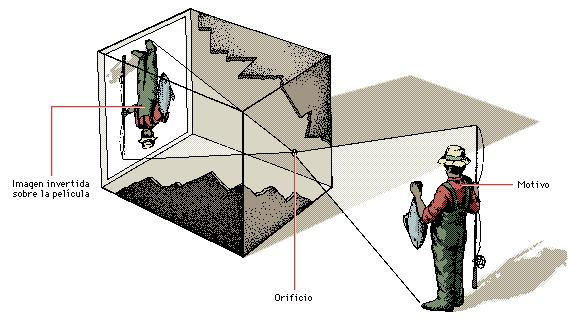



A pinhole camera, also known as camera obscura, or "dark chamber", is a simple optical imaging device in the shape of a closed box or chamber. In one of its sides is a small hole which, via the rectilinear propagation of light, creates an image of the outside space on the opposite side of the box

I mention it because basically this is the same operation of the current cameras only with a couple of filters and a lot of photo-sensors that we call Bayer pattern

<h3>Bayer Pattern</h3>

The Bayer filter, mask or mosaic is a type of matrix of filters, red, green and blue, which is placed on a digital image sensor (CCD or APS) to send each photodiode the luminosity information corresponding to a section of the various primary colors. Interpolating the samples from four neighboring photodiodes, a color pixel is obtained. Named for its creator, Bryce Bayer, of the Eastman Kodak company.

Bayer's mosaic is made up of 50% green filters, 25% red and 25% blue. Interpolating two green samples, one red, and one blue, one color pixel is obtained. In the Bryce Bayer patent, the light sensing elements are the greens, and the color sensing elements are the reds and blues. The reason that more green dots are used is that the human eye is more sensitive to that color. The arrangement of colors is usually red-green-red-green ... in one row, and green-blue-green-blue in the next parallel row.

In the RAW files of digital cameras, the Bayer pattern information is saved directly, without interpolations, which can later be used by digital development programs for a higher quality decoding than that allowed by internal algorithms. present on the capture devices.

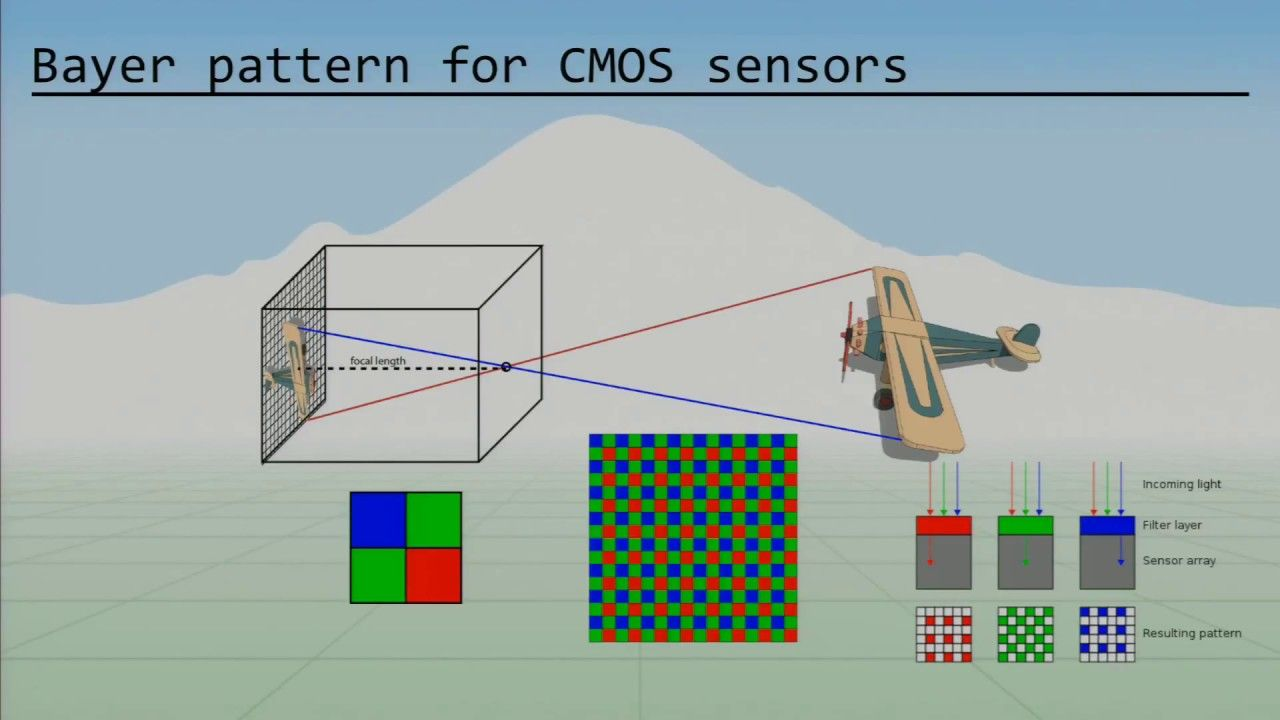



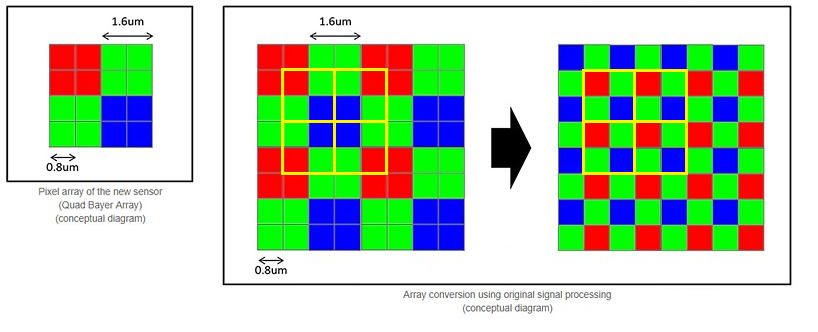



<h2>Reading Images on the Computer</h2>

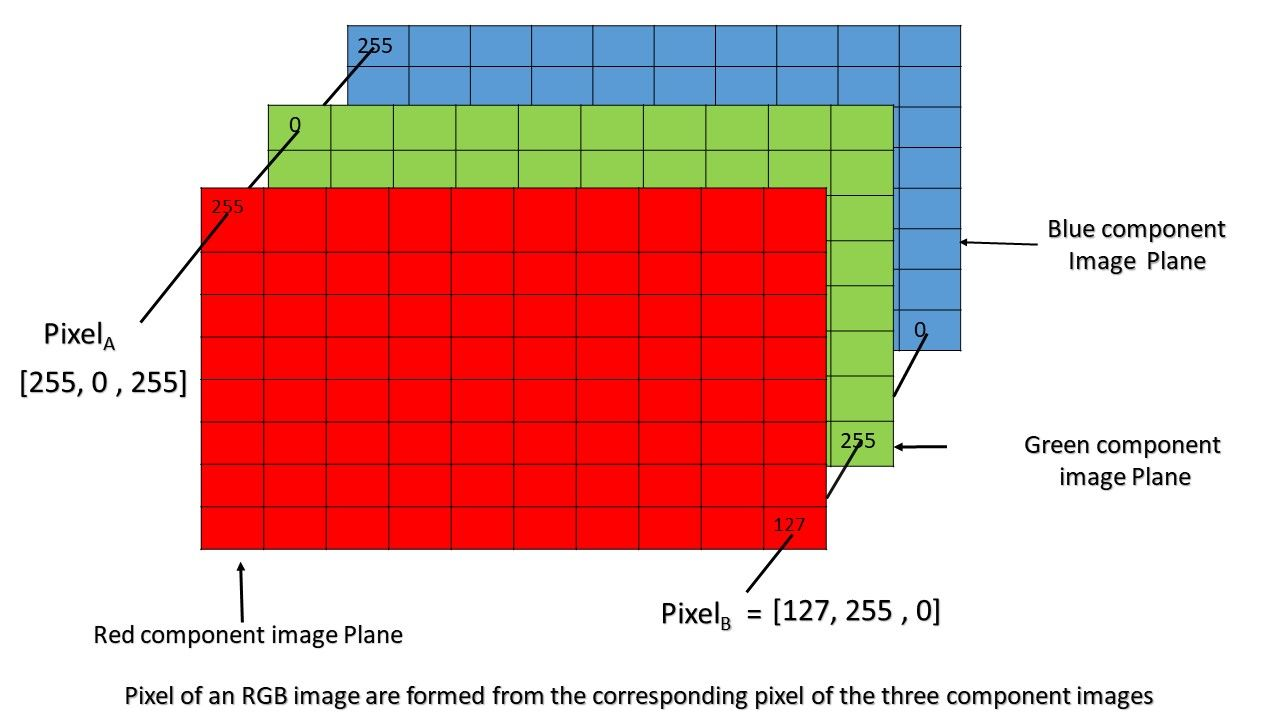



Images are generally represented as tensors (<b>tensor:</b> It is an algebraic representation of several components (more than 2) such as (X, Y, Z) or in this case (R, G, B) or (X, Y, Chanel)) 

<h3>Pixel Grid</h3>

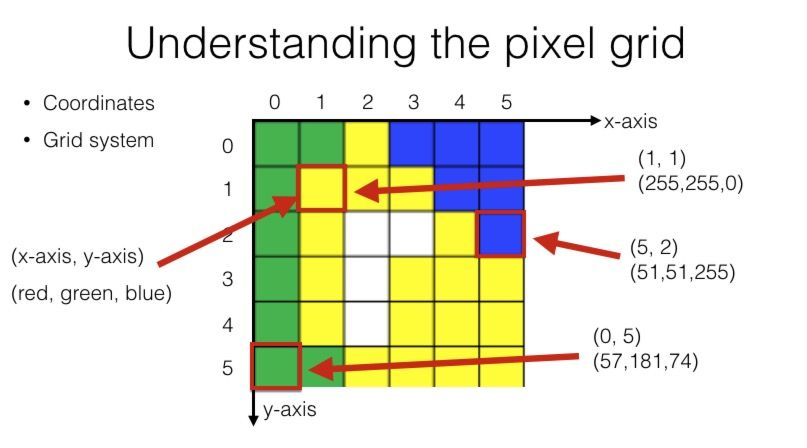



The pixels are assembled in a grid system. Each one has coordinates. Think of a coordinate system that you worked with in math. What are the coordinates for a single pixel on a grid? Each pixel is specified by its position within the grid system as identified by (x-axis, y-axis).

Resolution is determined by the width and height of the image. For example, for a 400px x 400px image, the resolution is 400 x 400 = 160,000. This can also be expressed as 0.16 megapixels.

<h3>Pixel read types</h3>

When we read an image, the cameras generally give us the data already interpolated, that is, for each pixel we have a value of each channel within a stream that could be seen as <b>80 99 234 0 45 83 94 2 ...</b>

when we read a two-dimensional matrix it is usually done in two ways by going through first the columns and then the rows (HW), or first the rows and then the columns (WH) <i>(W stands for Width and H for Height)</i>

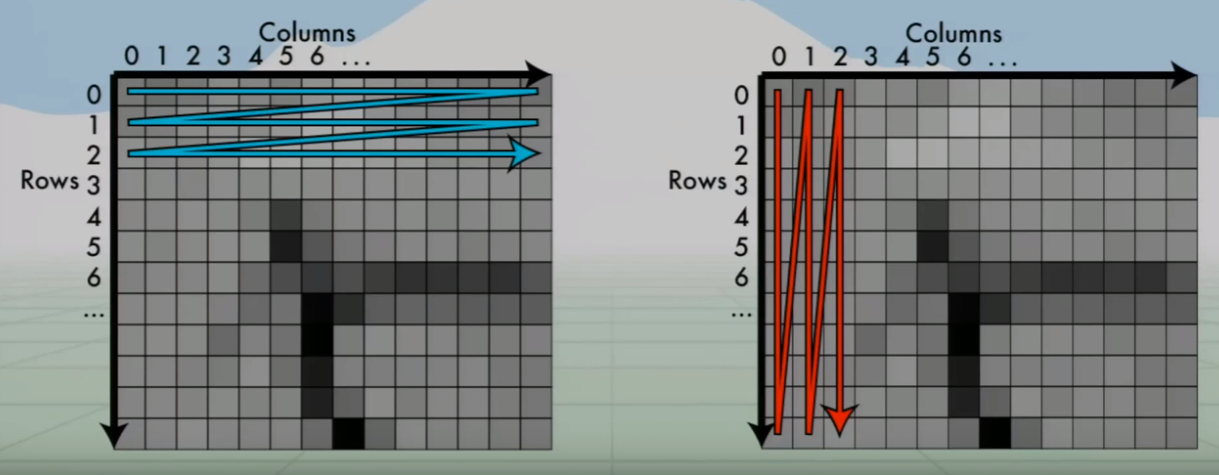



But in a three-dimensional tensor there are more options or formats:

<h4>HWC (Height, Width, Channel) </h4>

The pixels enter the stream as an RGB sequence

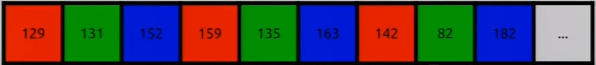



[(129,131,152),(159,135,163),...]

In [ ]:
import cv2 as cv2 #import open cv as cv2

# provide the location of image for reading  
img = cv2.imread('Assets/puppy.jpg',1)
print(img)

We are using libraries that allow us to see the image as we describe it (which is the format in which they are but without using the segmentations for the different standards and formats), but in a lower level language we would have to get into the real coding and nomenclature to load an image, if you want to know more about how to read RAW images in python you can read this link: https://yasoob.me/posts/understanding-and-writing-jpeg-decoder-in-python/

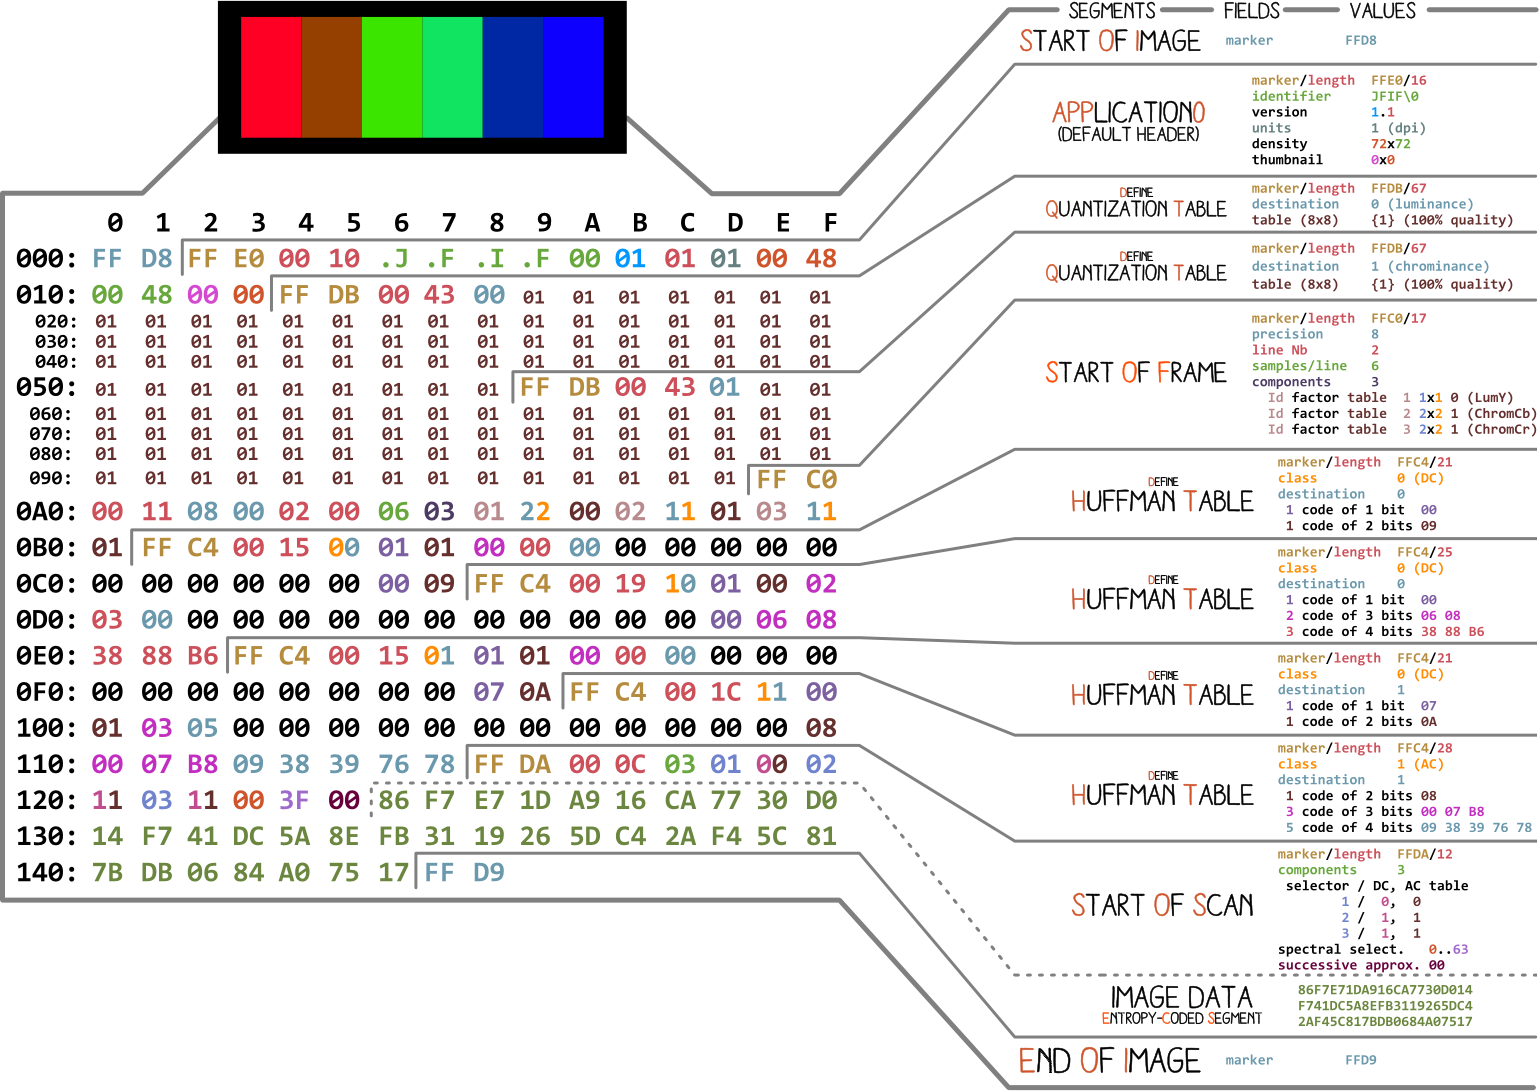

<div style="text-align:center" ><i>Different parts of a JPEG,  by Ange Albertini </i></div>

<h4>CHW (Channel, Height, Width)</h4>

The pixels enter as complete channels that are then structured according to the resolution of the image

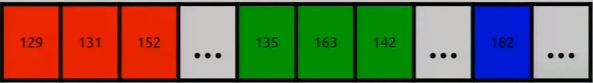



We know that the image is in this resolution when it is expressed as (1920 x 1080 x 3)

To know which pixel in the data stream will be (15,192,2) we use the vector calculation where for (x, y, z) we use the formula x + y*w + z*w*h = 15 + 192*1920 + 2*1920*1080 = 4,515,855

In [ ]:
# Necessary library used for this tutorial
import numpy as np

# For example a particular image in this case would contain (7360*4912) rows and columns meaning 36,152,320 pixels
ROWS = 7360    
COLS =  4912
# Different images have different dimensions. Change it accordingly

# Opening the input image (RAW)
fin = open('Assets/SPC_9058.NEF')     
print(fin)

There is one way that we can convert the 1D array to 2D array such as floor dividing the total number of pixels with rows and columns of the image or columns and columns (either is fine). This can be written with the help of a formula :

$img = tp // (cols, cols)$

<i>tp = total pixels; cols represent rows and columns of the image. The reason we are using floor division rather than division because we need to round off the values as a whole number.</i>

In [ ]:
# Loading the input image
print("... Load input image")
img = np.fromfile(fin, dtype = np.uint8, count = ROWS * COLS) #we use numpy just to make and array but it dont change the form of the loaded data
print("Dimension of the old image array: ", img.ndim)
print("Size of the old image array: ", img.size)

# Conversion from 1D to 2D array
img.shape = (img.size // COLS, COLS)
print("New dimension of the array:", img.ndim)
print("----------------------------------------------------")
print(" The 2D array of the original image is: \n", img)
print("----------------------------------------------------")
print("The shape of the original image array is: ", img.shape)

But generally we only work with images previously interpolated in formats such as jpg, (the cameras can give them to you directly in this way) so we will continue working with the <b>Open CV</b> library

<h2>Getting started with OpenCV</h2>

We always start by importing the library (this allows us to have access to its methods)

In [17]:
import cv2 as cv2 #import open cv as cv2

<h3>Read an Image</h3>

Use the function <b>cv2.imread()</b> to read an image. The image should be in the working directory or a full path of image should be given. <i>OpenCV loads the image with the channel order of BGR instead of RGB</i>

<b>cv2.imread('image.jpg', 0)</b> Second argument is a flag which specifies the way image should be read. (by default 1)

<table id="customers">

  <tr>
    <th>Flag</th>
    <th>Integer Value</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>cv2.IMREAD_COLOR</td>
    <td>cv2.IMREAD_GRAYSCALE</td>
    <td>cv2.IMREAD_UNCHANGED</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>-1</td>
  </tr>
    <tr>
    <td>Loads a color image.</td>
    <td>Loads image in grayscale mode</td>
    <td>Loads image as such inclduing alpha channel</td>
  </tr>
</table>
<style>
#customers {
  font-family: "Trebuchet MS", Arial, Helvetica, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

#customers td, #customers th {
  border: 1px solid #ddd;
  padding: 8px;
}

#customers tr:nth-child(even){background-color: #f2f2f2;}

#customers tr:hover {background-color: #ddd;}

#customers th {
  padding-top: 12px;
  padding-bottom: 12px;
  text-align: left;
  background-color: #4CAF50;
  color: white;
}
</style>

In [ ]:
img = cv2.imread('Assets/puppy.jpg') # if the image does not exist it does not give errors

<h3>Show an Image</h3>

In [ ]:
cv2.imshow('Nombre', img) # shows the image, the first argument is the name we want to give to the image and the second is the image we want to show
cv2.waitKey(5000) # we put how long we want the image to be shown, if we don't put it, it is shown and it is immediately removed, but the window is still open
# if the argument is 0 (cv2.waitKey (0)) the window with the displayed image does not close until we close it manually
cv2.destroyAllWindows() # we destroy all open windows, it doesn't destroy by itself and it could potentially freeze after finish the code

In [ ]:
cv2.imshow('Nombre', img)
key = cv2.waitKey(0) & 0xFF # We can save the value of the first key pressed (only the first one, if you want to see all of them, use recursion)
# & 0xFF is a mask in case cv2.waitKey(0) does not work in 64 bits, that makes it work
if key == 27:# 27 is the keycode of esc
    cv2.destroyAllWindows()
elif key == ord('s'): # ord() is an embedded function that gives the value of the string key
    cv2.imwrite('Assets/puppy_copy.jpg', img) # we save the image, we mention it in the next cell
    cv2.destroyAllWindows()

<h3>Save an Image</h3>

In [ ]:
cv2.imwrite('Assets/puppy_copy2.jpg', img) # the first argument is the name of the file where we want to save the image information, the second is the image we want to write to the file

<h3>Read from the camera (video)</h3>

A video is a succession of frames, so we only need to read each frame captured by the camera and display one behind the other

In [ ]:
cap = cv2.VideoCapture(0) # The index of the camera that you want to use or in the case of a video the URL is taken as an argument of the class
# videoCapture is a class then the instance of the created object is saved in a variable

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam, please try with another index")

# we get and print the width and height
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# you can see more values that can be obtained in:
# https://docs.opencv.org/4.0.0/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d

all values are associated with an index so the nomenclature can be <b>cap.get(cv2.CAP_PROP_FRAME_WIDTH) or cap.get(3)</b> for the width and <b>cap.get(cv2.CAP_PROP_FRAME_HEIGHT) or cap.get(4)</b> for the height

We will set a new screen size, although you can enter any number, the screen will only take the resolutions it can work at or the resolution closest to the set numbers

In [ ]:
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 3000)
cap.set(4, 3000)

We set the values, as the resolution of 3000 x 3000 does not exist, it will give us the highest that the camera can provide <i>(in videos we cannot set resolutions different from those already recorded)</i>

We print the width with the index 3 and the length with the 4, (to see the maximum values of the resolution of the camera)

In [ ]:
print(cap.get(3))
print(cap.get(4))

We create an infinite cycle to capture the frames of the video

In [24]:
while(True):
    flag, frame = cap.read() # we match the frame captured by the video instance to the flag and frame variables
    # the instance will contain the frame that if not empty will convert the flag variable to true if it does not exist it will be false
    cv2.imshow('frame', frame)# we show the frame
    if cv2.waitKey(1) & 0xFF == ord('q'): # if during this millisecond the value of "q" is pressed we end the loop
        break
cap.release()# drop the instance of the selected camera closing the buffer
cv2.destroyAllWindows() # we destroy the open windows

<h2>Read from a video</h2>

This time we use a video but everything else is exactly the same than before

In [25]:
cap = cv2.VideoCapture('Assets/201014_02_Bristol_4k_050.mp4')

while(True):
    flag, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<h2>Write from a video</h2>

<i>Remember that the code is waiting for you to press "q" to close the buffer and the video, if you don't press it it will keep recording.</i>

In [26]:
cap = cv2.VideoCapture(0)
fourCC = cv2.VideoWriter_fourcc(*'XVID') # we get the 4CC that we want to use, in this case XVID

# we create our video writer
out = cv2.VideoWriter('Assets/output.avi', fourCC, 20.0, (640,480))# the first argument is the name of the file we want to save, the second is the 4CC
# the third argument is the number of frames per second that we want to take and the 4 is the size of the frame in the video

while(cap.isOpened()):
    flag, frame = cap.read()
    if flag == True:
        out.write(frame) # write the frame in the video output
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
    else:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

<div style="text-align:center"><i><b>FOURCC</b> is short for "four character code" - an identifier for a video codec, compression format, color or pixel format used in media files. (https://www.fourcc.org/)</i></div>

The following code examples do not really have much to do with the subject, but I did not find how to mix them with the subject and they are basic knowledge that we may need in the following lectures

<h2>Draw in a frame</h2>

In [14]:
# you can create an image with numpy or read one with opencv
import numpy as np
img = np.zeros([512, 512, 3], np.uint8)
#img = cv2.imread('Assets/puppy.jpg',1)

<h3>Draw a line</h3>

We create a new image (and replace the old one with it), the first argument is the base image, the second the starting coordinates, the third the coordinates of the end of the line, the fourth the color in BGR format, the fifth thickness of the line in pixels <b>(cv2.line())</b>

In [4]:
img = cv2.line(img, (0,0), (255,255), (0, 0, 255),5)
cv2.imshow('Name', img) 
cv2.waitKey(0) # do not close the tab with the button, just press any letter
cv2.destroyAllWindows()

<h3>Draw an arrow</h3>

The arguments are the same as for the line, just change the method <b>(cv2.arrowedLine())</b>

In [5]:
img = cv2.arrowedLine(img, (0,255), (255,255), (255, 0, 0), 5)
cv2.imshow('Name', img) 
cv2.waitKey(0) # do not close the tab with the button, just press any letter
cv2.destroyAllWindows()

<h3>Draw a rectangle</h3>

The first attribute is the image, the second is the coordinates of the upper left corner (x1, y1), the third is the lower right corner (x2, y2) the fourth is the color and the fifth the thickness <b>(cv2.rectangle())</b>

In [ ]:
img = cv2.rectangle(img, (255,255), (500,500), (25, 55, 37), 5)
cv2.imshow('Name', img) 
cv2.waitKey(0) # do not close the tab with the button, just press any letter
cv2.destroyAllWindows()

If it is use -1 <i>(or cv2.FILLED)</i> in the thickness fill the box with the color provided

In [6]:
img = cv2.rectangle(img, (255,255), (500,500), (25, 55, 37), -1)
#img = cv2.rectangle(img, (255,255), (500,500), (25, 55, 37), cv2.FILLED)
cv2.imshow('Name', img) 
cv2.waitKey(0) # do not close the tab with the button, just press any letter
cv2.destroyAllWindows()

<h3>Draw a circle</h3>

The first argument is the image, the second is the coordinates of the center of the circle, the third the radius of the circle, the fourth the color and the fifth the thickness <b>(cv2.circle())</b>

In [ ]:
img = cv2.circle(img, (447, 63), 88, (0,255,0), 5)
cv2.imshow('Name', img) 
cv2.waitKey(0) # do not close the tab with the button, just press any letter
cv2.destroyAllWindows()

<h3>Draw a Polygon</h3>

The first argument is the image, the second is the array of polygons, the third the a flag indicating whether the drawn polylines are closed or not, the fourth the color and the fifth the thickness <b>(cv2.polylines())</b>

In [16]:
pts = np.array([[10,50], [70, 100], [50, 200]])
img = cv2.polylines(img, [pts], False, (0,255,0), 5)
cv2.imshow('Name', img) 
cv2.waitKey(0) # do not close the tab with the button, just press any letter
cv2.destroyAllWindows()

<h3>Draw text</h3>

We draw a text, the first argument is the image, the second the text, the third the starting point of the text, the fifth the size of the text, the sixth the color and the seventh the thickness <b>(cv2.putText())</b>

In [7]:
font = cv2.FONT_HERSHEY_SIMPLEX # we define a font from the text provided by opencv
img = cv2.putText(img, 'Amber', (100,100), font, 4, (255,255,255), 10)
cv2.imshow('Name', img) 
cv2.waitKey(0) # do not close the tab with the button, just press any letter
cv2.destroyAllWindows()

<h2>Print day and time on video</h2>

By now you are familiar with all the code and the only new introduction is the datetime library to display the day.

In [8]:
import datetime
cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    flag, frame = cap.read()
    if flag == True:
        font = cv2.FONT_HERSHEY_SIMPLEX 
        datet = str(datetime.datetime.now())
        frame = cv2.putText(frame, datet, (10,100), font, 1, (255,255,255), 2)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

<h2>Event Handlers in OpenCV </h2>

Let's see all the events we can use

In [ ]:
import numpy as np
events =[i for i in dir(cv2) if 'EVENT' in i] # we iterate using List Comprehensions all OpenCV events and return only those that contain EVENT in the text
print(events)

List Comprehensions is a powerful tool that replaces nested for loops (map, reduce, filter, etc...):

https://www.datacamp.com/community/tutorials/python-list-comprehension?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-486527602543&utm_loc_interest_ms=&utm_loc_physical_ms=1010132&gclid=CjwKCAiAp4KCBhB6EiwAxRxbpNqR5lfTIKwCUa9d5g5vCnVp8gGTKw2aJ8cMDWHro1-sx4hDPxL6xhoC7TQQAvD_BwE

Lets implement the mouse callback handler, and check for the left and right button click

In [18]:
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.imread('Assets/puppy.jpg',1)
cv2.imshow('image', img)

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        strXY = str(x) + ', ' + str(y)
        cv2.putText(img, strXY, (x,y), font, .5, (0,0,255), 1)
        cv2.imshow('image', img) # The name of the image must be the same to overwrite it
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y, x, 0] # Returns the intensity of the channel the arguments are position y, position x, channel 0
        green = img[y, x, 1] # channel  0 = B, 1 = G, 2 = R
        red = img[y, x, 2]
        strBGR = str(blue) + ', ' + str(green) + ', ' + str(red)
        cv2.putText(img, strBGR, (x,y), font, .5, (int(blue), int(green), int(red)), 1) # here we do not match the image img = ... because we do not want to replace the image but rather we want to add the text to the image already displayed
        cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)# we define the mouse callback in the image first argument name of the image second the function of the callback
cv2.waitKey(0)
cv2.destroyAllWindows()

Let's try to use the same cycle but now to connect the dots with a click

In [11]:
img = cv2.imread('Assets/puppy.jpg',1)
cv2.imshow('image', img)
points = [] # We define an empty array

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 3, (0, 0, 255), -1)
        points.append((x,y))# we add to the array an element with the values (x, y)
        if len(points) >= 2:
            cv2.line(img, points[-1], points[-2], (0, 0, 255), 3) # if the index of the array [] is negative, it looks for the last -1 added or second to last [-2] ...
        cv2.imshow('image', img) 

cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

Let's do a final exercise, where clicking on an pixel should create and image with only the color of the selected pixel, to demonstrate how to create an image with its three channels

In [12]:
img = cv2.imread('Assets/puppy.jpg',1)
cv2.imshow('image', img)
points = [] #definimos un array vacio

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[y, x, 0]
        green = img[y, x, 1]
        red = img[y, x, 2]
        cv2.circle(img, (x,y), 3, (0, 0, 255), -1)
        colorImg = np.zeros((512,512,3), np.uint8)
        colorImg[:] = [blue,green,red] #la notacion : significa todos los elementos en el arreglo
        #le asignamos a cada pixel el color BGR deceado
        cv2.imshow('color', colorImg)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h3>Representation of information in tensors</h3>

<B>RGB:</B> gives us the amount of color per channel, but sometimes we can transform between the different color spaces to obtain more information about our image or represent the same information in a compressed way to improve processing, such as <b>HSV</b> and <b>gray scale</b> cases.

<i>To switch between color spaces we can use <b>cv2.cvtColor()</b> where the first argument is the image and the second is from which space to which space we want to transform the image (it needs to be compatible with opencv)</i>

We use <b>grayscale</b> because it is a representation where only the total intensity of each pixel is loaded in a single channel, which for all applications in which color does not play an important factor we can use to reduce processing and improve the performance of our code.

In [3]:
image = cv2.imread('Assets/puppy.jpg') # we load the image in color only for the purpose of showing the conversion, but it can be loaded directly in black and white as we saw earlier
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
cv2.imshow('RGB image',image)
cv2.imshow('Gray image', gray)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

While we use <b>HSV (Hue, Saturation, Value)</b> (also known as <b>HSB</b> or <b>(hue, saturation, brightness)</b>) mainly because it defines a color model in terms of its components more closely align with the way human vision perceives color-making attributes, like the way different paints mix together to create color in the real world, with the lightness dimension resembling the varying amounts of black or white paint in the mixture

<b>Hue</b>:corresponds to the color components(base pigment), hence just by selecting a range of hue you can select any color. (0-360).<br>
<b>Saturation</b>: is the amount of color (depth of the pigment)(dominance of Hue)(Relationship between color and white)(0-100%)<br>
<b>Value</b>: is basically the brightness of the color (0-100%) (It cannot be considered as a grayscale representation because in this representation all colors contribute the same to the image (when we know that in the human eye each channel contributes differently))

<h3>Geometric RGB to HSV:</h3>

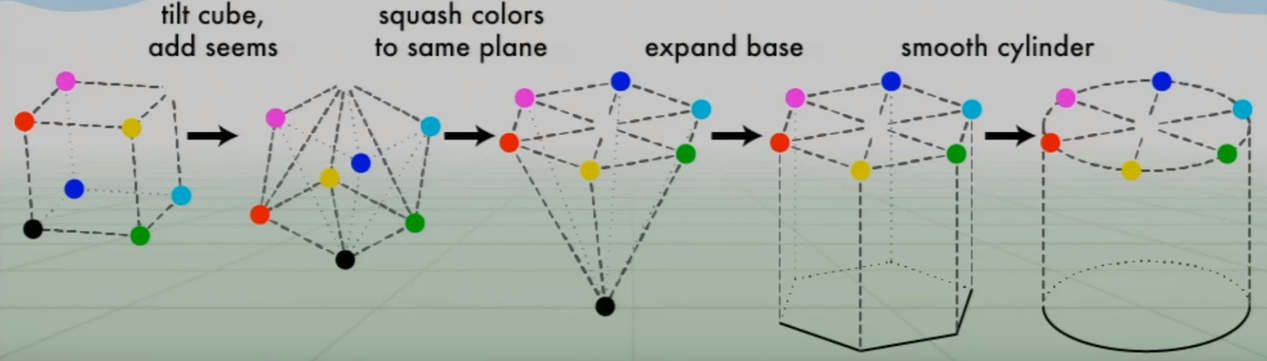



We will not go into detail about the geometric mathematics applied to transform from one space to another, it is only to illustrate how it is changed and why it maintains the initial color relationship, but expressed in a different way allows us to create new data to use, to see the math can see wikipedia: https://en.wikipedia.org/wiki/HSL_and_HSV

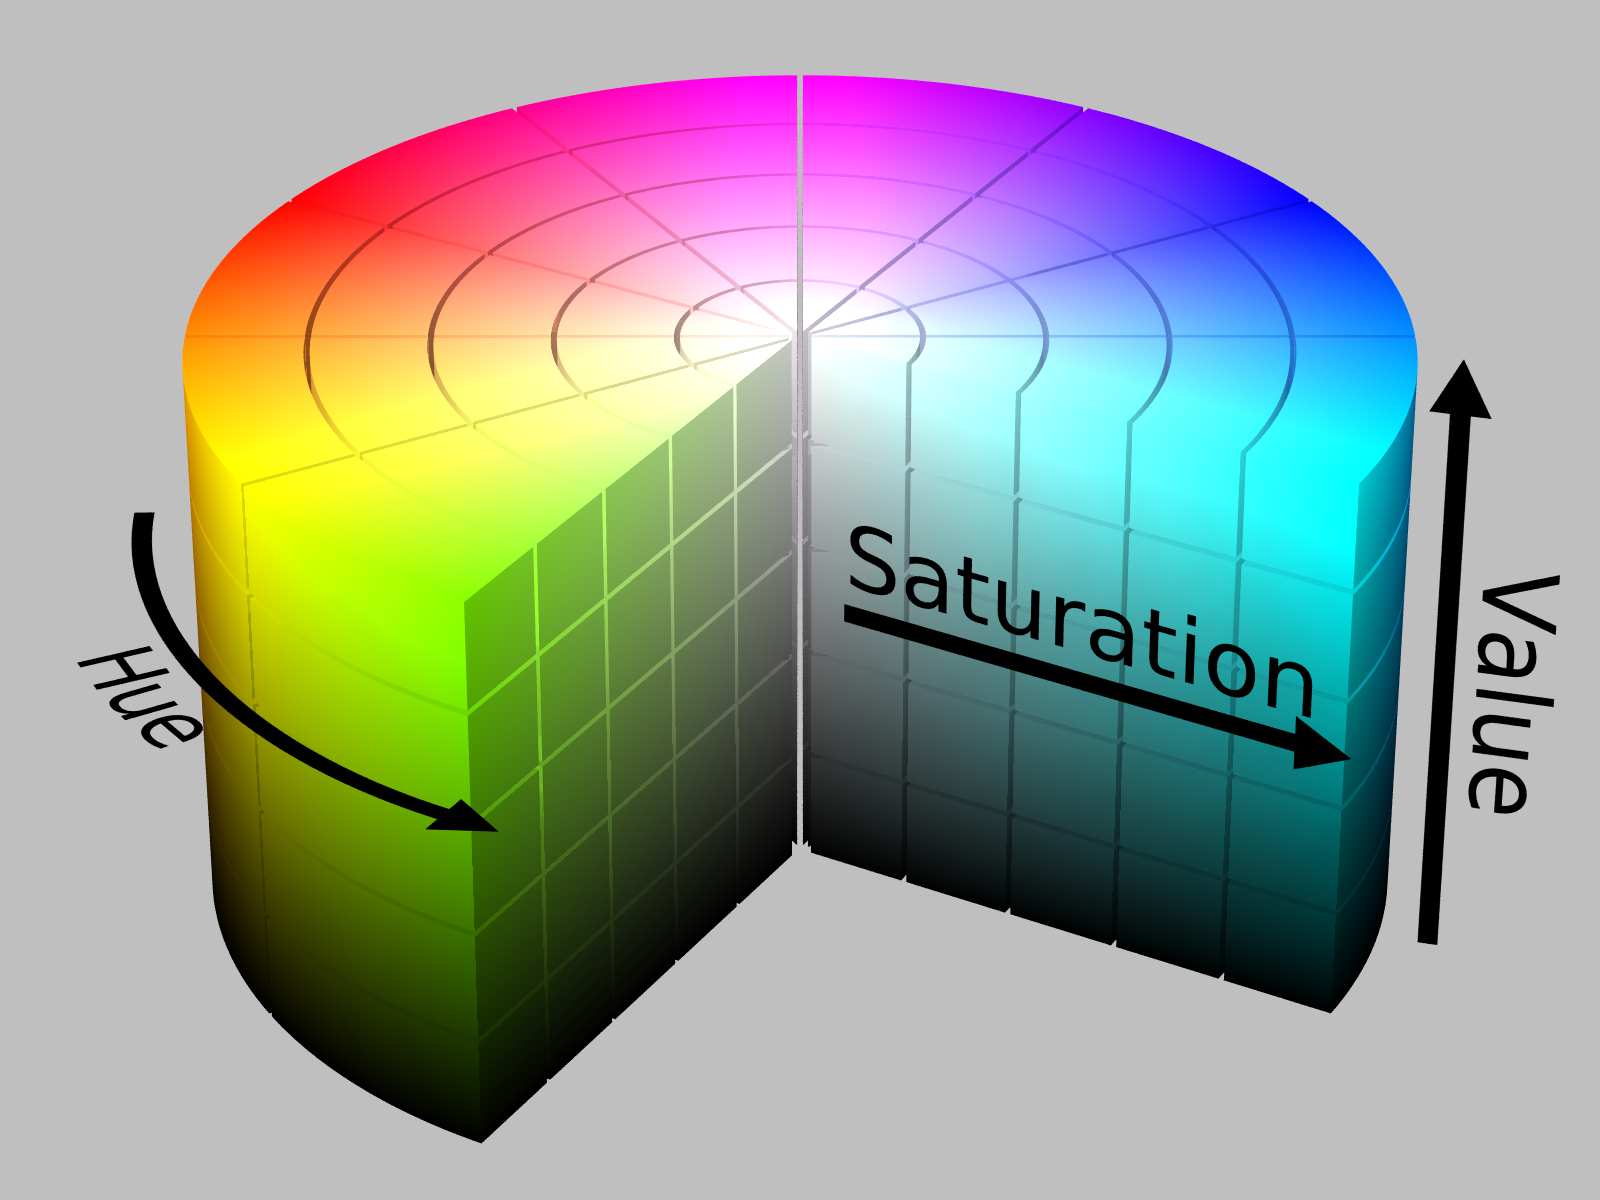

Still 3D tensor, different information

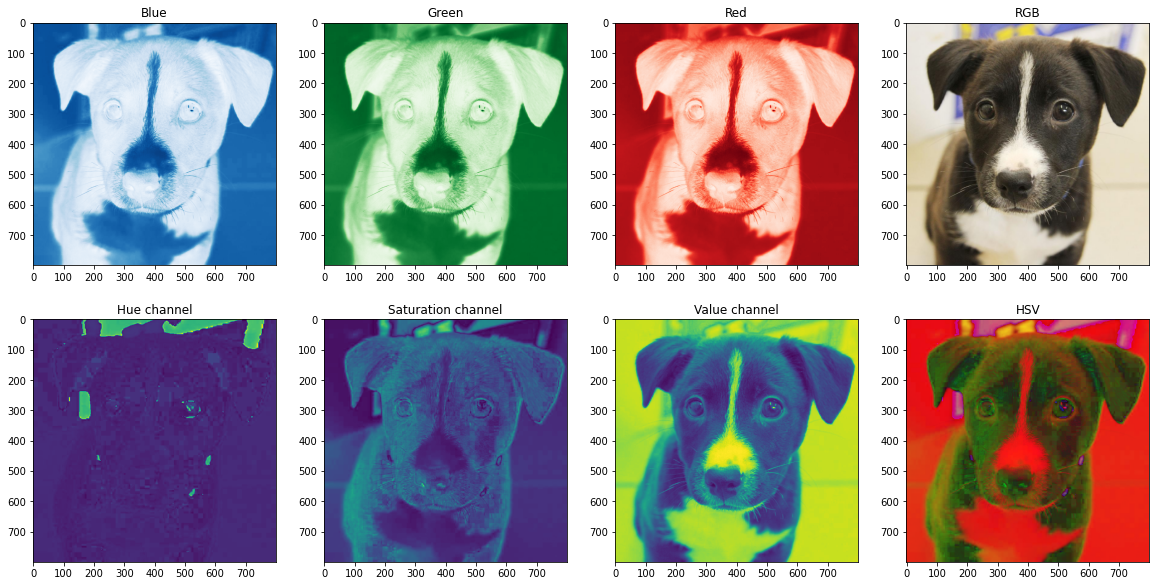

In [7]:
# we use matplotlib to plot the images in the notebook
import matplotlib.pyplot as plt

image = cv2.imread('Assets/puppy.jpg')
B, G, R = cv2.split(image)

fig, axs = plt.subplots(2,4, figsize=(20, 10))
axs[0][0].set_title('Blue')
axs[0][0].imshow(B, cmap='Blues')
axs[0][1].set_title('Green')
axs[0][1].imshow(G , cmap='Greens')
axs[0][2].set_title('Red')
axs[0][2].imshow(G , cmap='Reds')
axs[0][3].set_title('RGB')
axs[0][3].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

hsv_Image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

axs[1][0].set_title('Hue channel')
axs[1][0].imshow(hsv_Image[:,:,0])
axs[1][1].set_title('Saturation channel')
axs[1][1].imshow(hsv_Image[:,:,1])
axs[1][2].set_title('Value channel')
axs[1][2].imshow(hsv_Image[:,:,2])
axs[1][3].set_title('HSV')
axs[1][3].imshow(cv2.cvtColor(hsv_Image, cv2.COLOR_BGR2RGB))

we can even play with the different channels applying individual operations in each of them

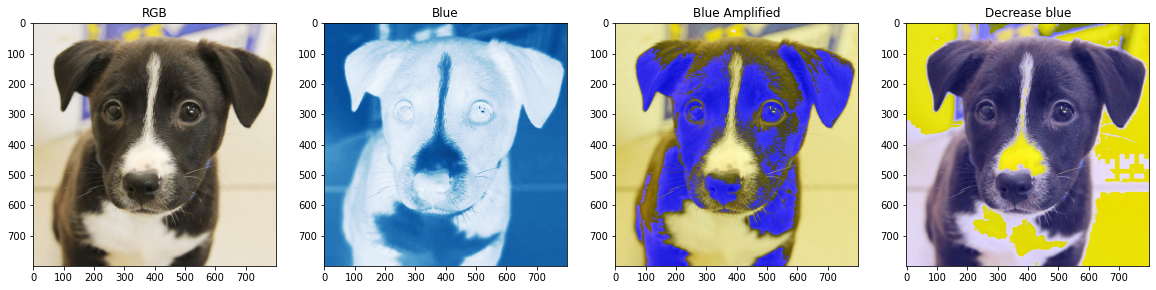

In [10]:
import matplotlib.pyplot as plt

image = cv2.imread('Assets/puppy.jpg')
B, G, R = cv2.split(image)

merged = cv2.merge([B, G, R])
mergedMoreBlue = cv2.merge([B + 200, G, R])
mergedLessBlue = cv2.merge([B - 200, G, R])

# we use matplotlib to plot the images in the notebook

fig, axs = plt.subplots(1,4, figsize=(20, 10))
axs[0].set_title('RGB')
axs[0].imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
axs[1].set_title('Blue')
axs[1].imshow(B, cmap='Blues')
axs[2].set_title('Blue Amplified')
axs[2].imshow(cv2.cvtColor(mergedMoreBlue, cv2.COLOR_BGR2RGB))
axs[3].set_title('Decrease blue')
axs[3].imshow(cv2.cvtColor(mergedLessBlue, cv2.COLOR_BGR2RGB))

<h2>Object Detection and Object Tracking Using HSV</h2>

Let's start with a little exercise so that you understand how trackbars are made and work.

In [19]:
import numpy as np

def TrackbarB(x):
    print(x)
def TrackbarG(x):
    print(x)
def TrackbarR(x):
    print(x)
    
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('ventana') # we create a window which we call ventana

cv2.createTrackbar('B','ventana',0,255,TrackbarB) # we create a trackbar, the first argument is the name, the second is the window to which we will add the trackbar, the third is the initial value, the fourth is the final value, and the fifth is the callback function
cv2.createTrackbar('G','ventana',0,255,TrackbarG)
cv2.createTrackbar('R','ventana',0,255,TrackbarR)
while(1):
    cv2.imshow('ventana',img) # we show the image in the window window
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
        
    b = cv2.getTrackbarPos('B', 'ventana') # we get the value of the trackbar, the first argument is the name of the trackbar, the second the window where it is located
    g = cv2.getTrackbarPos('G', 'ventana')
    r = cv2.getTrackbarPos('R', 'ventana')

    img[:] = [b, g, r] # we assign to all the pixels of the image the values in their respective channels

    
cv2.destroyAllWindows()

<b>Notes about waitkey</b>:

<b>waitKey(0)</b> will display the window infinitely until any keypress (it is suitable for image display).

<b>waitKey(1)</b> will display a frame for 1 ms, after which display will be automatically closed.

<b>waitKey(0)</b> will pause your screen because it will wait infinitely for keyPress on your keyboard and will not refresh the frame. <b>waitKey(1)</b> will wait for keyPress for just 1 millisecond and it will continue to refresh and read frame.

First let's try using the colors to see only the blue M&M in the picture

In [6]:
import numpy as np

def nothing(x):
    pass # does nothing 
    
cv2.namedWindow('Tracking')
# we define trackbars to obtain the lower HSV values
cv2.createTrackbar('LH','Tracking',0,255,nothing)
cv2.createTrackbar('LS','Tracking',0,255,nothing)
cv2.createTrackbar('LV','Tracking',0,255,nothing)
# we define trackbars to obtain the upper HSV values
cv2.createTrackbar('UH','Tracking',255,255,nothing)
cv2.createTrackbar('US','Tracking',255,255,nothing)
cv2.createTrackbar('UV','Tracking',255,255,nothing)

while True:
    frame = cv2.imread('Assets/M&M.jpg')
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # we convert the image into hsv
    
    # we get the values of the trackbars
    l_h = cv2.getTrackbarPos('LH', 'Tracking')
    l_s = cv2.getTrackbarPos('LS', 'Tracking')
    l_v = cv2.getTrackbarPos('LV', 'Tracking')
    u_h = cv2.getTrackbarPos('UH', 'Tracking')
    u_s = cv2.getTrackbarPos('US', 'Tracking')
    u_v = cv2.getTrackbarPos('UV', 'Tracking')
    
    # we define the threshold (Limit) of colors to detect
    l_b = np.array([l_h,l_s,l_v]) # we define a lower bound array (we use np array because python lists are not typed)
    u_b = np.array([u_h,u_s,u_v]) #we define an array of the upper limit
    
    # Ideal values for blue
    #l_b = np.array([88,134,0])
    #u_b = np.array([113,255,255]) 
    
    mask= cv2.inRange(hsv, l_b, u_b) # we define a mask, the first argument is the image you want to mask, the second the lower limit and the third the upper limit
    
    res = cv2.bitwise_and(frame,frame,mask=mask) # we mix the image with itself but with a mask the third argument is the mask
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
    
cv2.destroyAllWindows()

Now let's try the same but in a video, once the mask is created we can color its contours in the original image and thus be able to visually trace the color we want

<b>Operation</b>: when reducing the colors and leaving only the target color in the mask, we can press a lowercase <b>'t'</b> to start seeing a green color around it in the original image, press a lowercase <b>'s'</b> to starts saving the video and a lowercase <b>'r'</b> to release it

<b>Note</b>: we will not talk in depth about the contours because in a future lesson we will talk about the mathematics behind finding edges but for the moment we will only use it

<div style="display: flex;" >
    <div style="width:100%;text-align:center">
    <div style="align-items: center;justify-content: center;display: flex;height: 100%;width: 100%;"><img src="Assets/HSVDEMO2.gif"></div> 
</div>

In [29]:
import numpy as np

fourCC = cv2.VideoWriter_fourcc(*'XVID')

out = cv2.VideoWriter('Assets/HSV.avi', fourCC, 20.0, (640,480))

def nothing(x):
    pass

showC = False
saveC = False
releaseC = False

cap = cv2.VideoCapture(0)

cv2.namedWindow('Tracking')
cv2.createTrackbar('LH','Tracking',0,255,nothing)
cv2.createTrackbar('LS','Tracking',0,255,nothing)
cv2.createTrackbar('LV','Tracking',0,255,nothing)
cv2.createTrackbar('UH','Tracking',255,255,nothing)
cv2.createTrackbar('US','Tracking',255,255,nothing)
cv2.createTrackbar('UV','Tracking',255,255,nothing)

while True:
    flag, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    
    l_h = cv2.getTrackbarPos('LH', 'Tracking')
    l_s = cv2.getTrackbarPos('LS', 'Tracking')
    l_v = cv2.getTrackbarPos('LV', 'Tracking')
    u_h = cv2.getTrackbarPos('UH', 'Tracking')
    u_s = cv2.getTrackbarPos('US', 'Tracking')
    u_v = cv2.getTrackbarPos('UV', 'Tracking')
    
    l_b = np.array([l_h,l_s,l_v])
    u_b = np.array([u_h,u_s,u_v])
    
    mask= cv2.inRange(hsv, l_b, u_b) 
    
    res = cv2.bitwise_and(frame,frame,mask=mask)
    
    if showC:
        # this is the contour block, ignore it for now
        imgray=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(imgray, 127,255,0)
        _, contour, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(frame,contour, -1, (0,255,0), 3)
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    if saveC:
        out.write(frame)
        
    if releaseC:
        out.release()
        
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break      
    if key == ord('t'):
        showC^=True # toggle the variable
    if key == ord('s'):
        saveC^=True # toggle the variable
    if key == ord('r'):
        releaseC^=True # toggle the variable

cap.release()
cv2.destroyAllWindows()

There are a lot of color spaces that provide us with different information, some of them are the following:

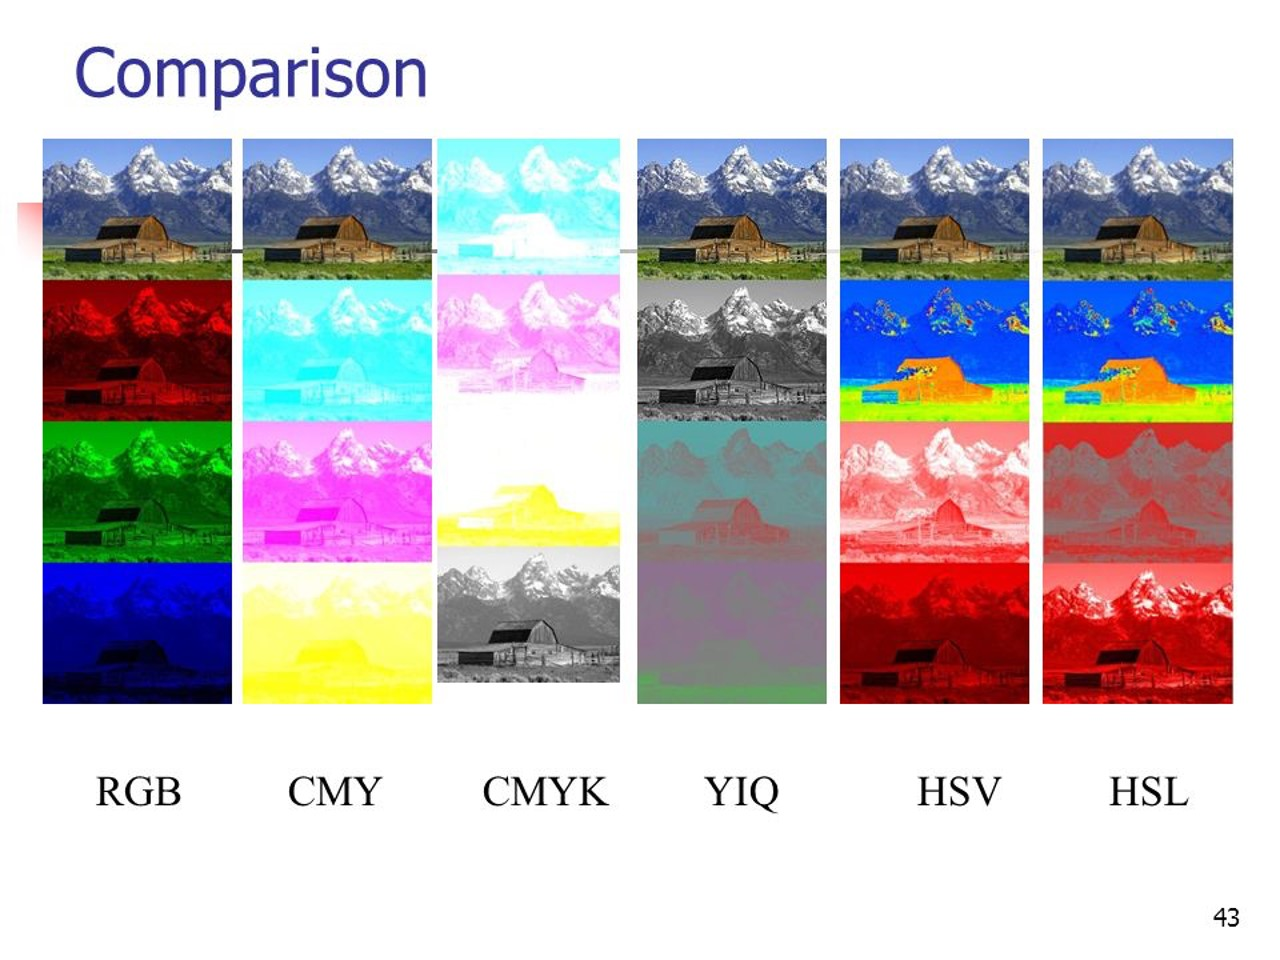

Each of the transformations between color spaces are mathematical geometric transformations for which they preserve their relationship with each other, these are not the geometric transformations, they are only representations of them in different geometries:

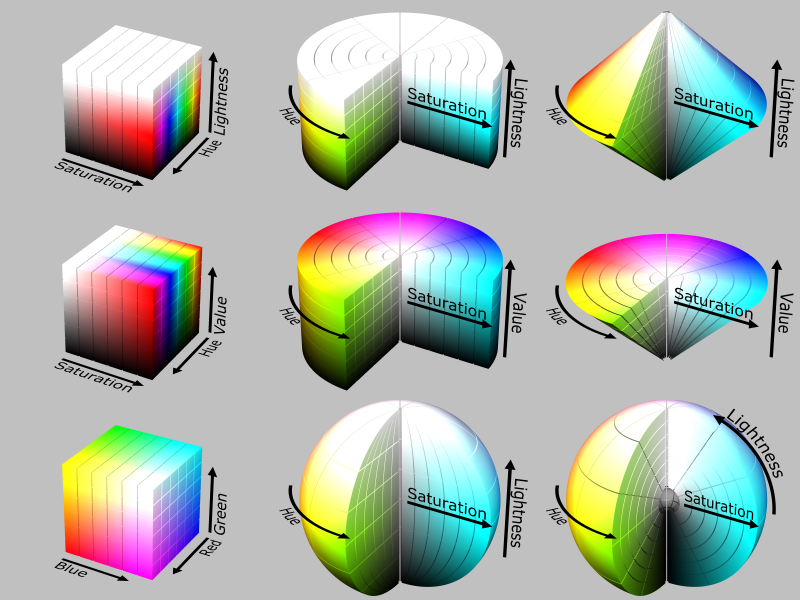

<div style="text-align:center"><i>Geometric representation of HSL, HSV, RGB</i></div>

<b>Author</b>: Amber Macias

<b>Sources:</b>

<i>The documents and web pages from which I only take images of concepts or small parts are not on this list, here are only the largest sources of information due to the fact that the material is very extensive</i>

The Ancient Secrets of Computer Vision -03- Image Basics, Joseph Redmon:
https://www.youtube.com/watch?v=hpqrDUuk7HY&list=PLjMXczUzEYcHvw5YYSU92WrY8IwhTuq7p&index=4
